In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_power =  pd.read_csv('/content/Time_series_analysis_and_forecast_DATASET.csv',low_memory=False,
                       infer_datetime_format=True, parse_dates=["FullDate"],index_col=["FullDate"])
df_power.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [3]:
# NUMBER OF ROWS AND COLUMNS
df_power.shape

(92016, 4)

In [4]:
# FIND THE MISSING DATA
df_power.isna().sum()

Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [5]:
df_power.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [6]:
df_power.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92016 entries, 2010-09-01 00:00:00 to 2021-02-28 23:00:00
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tmax       92016 non-null  float64
 1   SysLoad    92016 non-null  float64
 2   GasPrice   92016 non-null  float64
 3   ElecPrice  92016 non-null  float64
dtypes: float64(4)
memory usage: 3.5 MB


In [7]:
#down sample of daily data points
df_power_daily = df_power.resample('D').sum()
df_power_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3834 entries, 2010-09-01 to 2021-02-28
Freq: D
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tmax       3834 non-null   float64
 1   SysLoad    3834 non-null   float64
 2   GasPrice   3834 non-null   float64
 3   ElecPrice  3834 non-null   float64
dtypes: float64(4)
memory usage: 149.8 KB


Text(0, 0.5, 'ElecPrice')

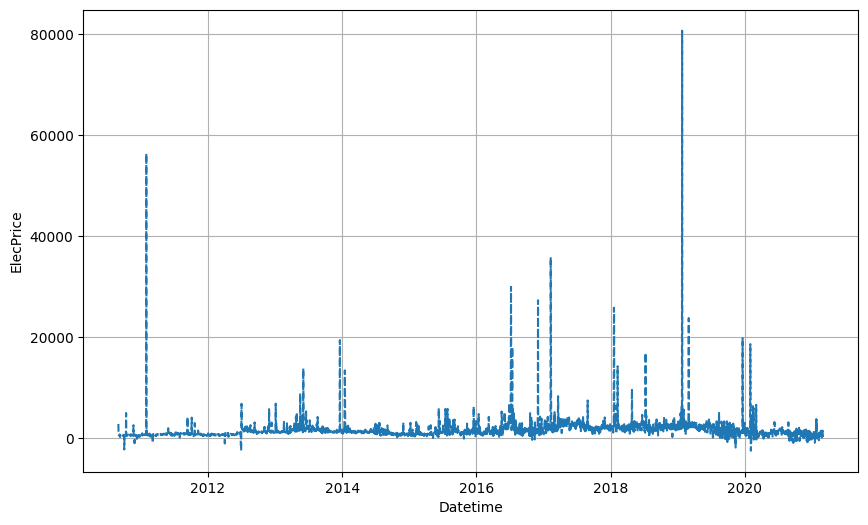

In [8]:
#ploting daily global_active_power over time
plt.figure(figsize=(10,6))
plt.plot(df_power_daily.index, df_power_daily.ElecPrice, '--')
plt.grid()
plt.xlabel('Datetime')
plt.ylabel('ElecPrice')

In [9]:
#Importing the ADF library
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

adf_sysload = adfuller(df_power_daily['SysLoad'])
adf_gasprice = adfuller(df_power_daily['GasPrice'])
print(f'p-value of the SysLoad: {round(adf_sysload[1],6)}')
print(f'p-value of the GasPrice: {round(adf_gasprice[1],6)}')

p-value of the SysLoad: 0.004254
p-value of the GasPrice: 0.045027


In [10]:
# index reset
df_power_daily = df_power_daily.reset_index()
df_power_daily.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [11]:
from statsmodels.tsa.stattools import adfuller
GasPrice_CV = adfuller(df_power_daily['GasPrice'])
print('Critical Values:')
for k, v in GasPrice_CV[4].items():
 print(f'{k} : {v}')

Critical Values:
1% : -3.4320693157877544
5% : -2.8622996992165364
10% : -2.5671743978048323


In [12]:
ElecPrice_CV = adfuller(df_power_daily['ElecPrice'])
print('Critical Values:')
for k, v in ElecPrice_CV[4].items():
 print(f'{k} : {v}')

Critical Values:
1% : -3.432066157296446
5% : -2.8622983040036005
10% : -2.5671736550459663


In [13]:
# Rest the index
df_power_daily.reset_index(inplace=True)

In [14]:
#Split the dataset
train = df_power_daily.iloc[:2757,:]
test = df_power_daily.iloc[2757:,:]

In [15]:
train.shape

(2757, 6)

In [16]:
train.head()

,index,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,0,2010-09-01,379.2,41565.380,88.56,2751.700
1,1,2010-09-02,369.6,38898.990,88.56,570.810
2,2,2010-09-03,439.2,41665.760,106.80,504.975
3,3,2010-09-04,328.8,35638.085,81.36,502.275
4,4,2010-09-05,357.6,35611.410,106.80,500.555


In [17]:
test.shape

(1077, 6)

In [18]:
test.head()

,index,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
2757,2757,2018-03-20,540.0,7696.91130,201.5880,1833.00
2758,2758,2018-03-21,571.2,4658.05865,203.2560,1730.49
2759,2759,2018-03-22,722.4,19161.78525,203.2560,2260.55
2760,2760,2018-03-23,811.2,18090.43435,198.6456,2138.76
2761,2761,2018-03-24,832.8,3763.53865,180.2160,1721.70


In [19]:
# columns selection for predictive model
df_model_data = df_power_daily[['FullDate', 'ElecPrice']]

# columns rename to 'ds' and 'y' respectively
df_model_data = df_model_data.rename(columns={'FullDate':'ds', 'ElecPrice':'y'})

df_model_data.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [21]:
# assigning training and testing data
train = df_model_data[:2757]
test = df_model_data[2757:]
print('train shape', train.shape)
print('test shape', test.shape)

train shape (2757, 2)
test shape (1077, 2)


In [22]:
# Defining the MAPE function
def mape(y, yhat):
  y = y.reset_index(drop=True)
  return round(np.mean(np.abs((y - yhat)/y)*100),2)

In [23]:
# train data fit to Fbprophet model
from prophet import Prophet
#from fbprophet import Prophet
model = Prophet()
model.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptl7xnqss/1gj1_z0l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptl7xnqss/cy442677.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88581', 'data', 'file=/tmp/tmptl7xnqss/1gj1_z0l.json', 'init=/tmp/tmptl7xnqss/cy442677.json', 'output', 'file=/tmp/tmptl7xnqss/prophet_modelcysi2qga/prophet_model-20230801200922.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:09:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:09:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [24]:
pred1 = model.predict(test)
mape(test['y'],pred1['yhat'])

544.09

In [25]:
# Defining the RMSE function
def rmse(y, yhat):
  y = y.reset_index(drop=True)
  return round(np.sqrt(np.mean(np.square(y - yhat))),2)

In [26]:
rmse(test['y'], pred1['yhat'])

3207.46

In [27]:
# Next 365 days prediction
# future = model.make_future_dataframe(periods=365, freq='D')
forecast = model.predict(test)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2684.522366,152.865252,4857.771104,2684.522366,2684.522366,-157.277098,-157.277098,-157.277098,9.755659,9.755659,9.755659,-167.032757,-167.032757,-167.032757,0.0,0.0,0.0,2527.245268
1,2018-03-21,2685.313840,165.177620,4951.327794,2685.313840,2685.313840,-4.693954,-4.693954,-4.693954,159.421504,159.421504,159.421504,-164.115459,-164.115459,-164.115459,0.0,0.0,0.0,2680.619886
2,2018-03-22,2686.105314,444.155151,5201.265413,2686.105314,2686.105314,93.604040,93.604040,93.604040,257.239178,257.239178,257.239178,-163.635138,-163.635138,-163.635138,0.0,0.0,0.0,2779.709354
3,2018-03-23,2686.896788,344.535074,5038.337588,2686.896788,2686.896788,-115.130706,-115.130706,-115.130706,50.294929,50.294929,50.294929,-165.425635,-165.425635,-165.425635,0.0,0.0,0.0,2571.766082
4,2018-03-24,2687.688263,-177.944667,4724.818605,2687.688263,2687.688263,-440.838320,-440.838320,-440.838320,-271.594004,-271.594004,-271.594004,-169.244315,-169.244315,-169.244315,0.0,0.0,0.0,2246.849943


In [28]:
#what is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2018-03-20,2527.245268,152.865252,4857.771104,2684.522366,2684.522366,2684.522366
1,2018-03-21,2680.619886,165.177620,4951.327794,2685.313840,2685.313840,2685.313840
2,2018-03-22,2779.709354,444.155151,5201.265413,2686.105314,2686.105314,2686.105314
3,2018-03-23,2571.766082,344.535074,5038.337588,2686.896788,2686.896788,2686.896788
4,2018-03-24,2246.849943,-177.944667,4724.818605,2687.688263,2687.688263,2687.688263
...,...,...,...,...,...,...,...
1072,2021-02-24,3439.324579,789.393003,6397.761392,3532.982694,1809.974376,5231.195573
1073,2021-02-25,3506.343399,736.389365,6462.206719,3533.774169,1809.019056,5234.804236
1074,2021-02-26,3273.143175,422.604536,6406.380701,3534.565643,1808.063737,5238.356728
1075,2021-02-27,2929.735061,8.756301,5910.235673,3535.357117,1807.108417,5241.205814


In [30]:
pred1 = model.predict(test)
mape(test['y'],pred1['yhat'])

544.09

In [31]:

mape = np.mean(np.abs(np.array(test['y']) - np.array(forecast.yhat))/ np.array(test['y'])) *100

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(np.array(test['y']),np.array(forecast['yhat'])))

print('mean_absolute_percentage_error', round(mape,2))
print('root mean_squared_error', round(rmse,2))

mean_absolute_percentage_error -133.2
root mean_squared_error 3207.46


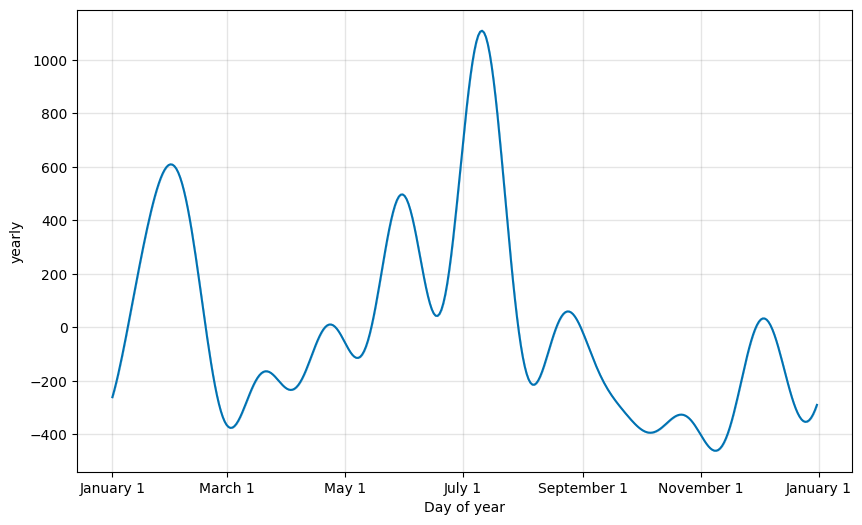

In [32]:
#from fbprophet.plot import plot_yearly
from prophet.plot import plot_yearly
plot_yearly(model)

July has the high value

In [33]:
multi_model = df_power_daily.rename(columns = {'FullDate':'ds','ElecPrice':'y',
                                           'SysLoad':'add1','Tmax':'add2',
                                           'GasPrice':'add3'})
multi_model.head()

,index,ds,add2,add1,add3,y
0,0,2010-09-01,379.2,41565.380,88.56,2751.700
1,1,2010-09-02,369.6,38898.990,88.56,570.810
2,2,2010-09-03,439.2,41665.760,106.80,504.975
3,3,2010-09-04,328.8,35638.085,81.36,502.275
4,4,2010-09-05,357.6,35611.410,106.80,500.555


In [34]:
# assign train and test data
train2 = multi_model[:2757]
test2 = multi_model[2757:]
print('train shape', train2.shape)
print('test shape', test2.shape)

train shape (2757, 6)
test shape (1077, 6)


In [35]:
#create multivariate model
model2 = Prophet()
model2.add_regressor('add1')
model2.add_regressor('add2')
model2.add_regressor('add3')

In [36]:
model2.fit(train2)

forecast2 = model2.predict(test2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptl7xnqss/6siv71ul.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptl7xnqss/vu1qgjrn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79932', 'data', 'file=/tmp/tmptl7xnqss/6siv71ul.json', 'init=/tmp/tmptl7xnqss/vu1qgjrn.json', 'output', 'file=/tmp/tmptl7xnqss/prophet_model3mlkrwe9/prophet_model-20230801201206.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:12:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:12:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [37]:
forecast2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,1865.204282,-213.465787,4322.358051,1865.204282,1865.204282,-856.253614,-856.253614,-856.253614,0.234389,...,-84.494538,-84.494538,-84.494538,-38.857060,-38.857060,-38.857060,0.0,0.0,0.0,1986.140088
1,2018-03-21,1865.891589,-282.194471,4181.081715,1865.891589,1865.891589,-1026.241961,-1026.241961,-1026.241961,0.231608,...,42.479487,42.479487,42.479487,-29.571833,-29.571833,-29.571833,0.0,0.0,0.0,1977.544546
2,2018-03-22,1866.578897,707.717894,5043.603727,1866.578897,1866.578897,-214.927695,-214.927695,-214.927695,0.218133,...,145.618830,145.618830,145.618830,-24.542320,-24.542320,-24.542320,0.0,0.0,0.0,2897.701501
3,2018-03-23,1867.266204,379.367644,4799.512781,1867.266204,1867.266204,-274.857277,-274.857277,-274.857277,0.210219,...,-44.306420,-44.306420,-44.306420,-23.627175,-23.627175,-23.627175,0.0,0.0,0.0,2581.863394
4,2018-03-24,1867.953512,-831.900120,3683.566883,1867.953512,1867.953512,-1076.279917,-1076.279917,-1076.279917,0.208294,...,-117.532133,-117.532133,-117.532133,-26.575669,-26.575669,-26.575669,0.0,0.0,0.0,1434.816566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,2021-02-24,2601.997966,-1531.822945,3183.499353,1843.951161,3414.462584,-1372.139772,-1372.139772,-1372.139772,0.234603,...,42.479487,42.479487,42.479487,-433.536967,-433.536967,-433.536967,0.0,0.0,0.0,954.521071
1073,2021-02-25,2602.685274,-1089.179281,3550.416776,1843.601246,3416.551299,-1032.897509,-1032.897509,-1032.897509,0.236314,...,145.618830,145.618830,145.618830,-459.961112,-459.961112,-459.961112,0.0,0.0,0.0,1314.072916
1074,2021-02-26,2603.372581,-857.565720,3632.882240,1843.251331,3418.597905,-754.439530,-754.439530,-754.439530,0.233747,...,-44.306420,-44.306420,-44.306420,-480.615624,-480.615624,-480.615624,0.0,0.0,0.0,1377.886784
1075,2021-02-27,2604.059889,-1340.717979,3421.759564,1842.901416,3420.630659,-1010.868905,-1010.868905,-1010.868905,0.232250,...,-117.532133,-117.532133,-117.532133,-495.262914,-495.262914,-495.262914,0.0,0.0,0.0,1032.792721


In [38]:

#calculating mean absolute percentage error
mape2 = np.mean(np.abs(np.array(test2['y']) -np.array(forecast2['yhat']))/ np.array(test2['y'])) *100
round(mape2,2)

-63.24

In [39]:

#calculate rmse
rmse2 = np.sqrt(mean_squared_error(np.array(test2['y']),np.array(forecast2['yhat'])))
round(rmse2,2)

2707.16

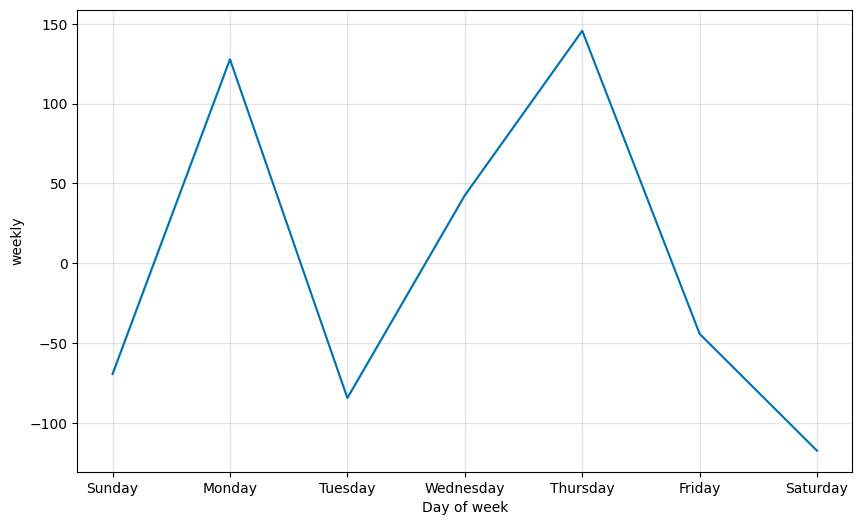

In [40]:

# visualize each components (trends, monthly)
#from fbprophet.plot import plot_weekly
from prophet.plot import plot_weekly
plot_weekly(model2)

Thursday has the high value